# Data mining with python

### Contents
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Using ML Models

### Data dict
VariableDefinitionKey 
* **survival** Survival 0 = No, 1 = Yes 
* **pclass** Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
* **sex** Sex 
* **age** Age in years 
* **sibsp** # of siblings / spouses aboard the Titanic parch # of parents / * children aboard the Titanic 
* **ticket** Ticket number 
* **fare** Passenger fare 
* **cabin** Cabin number 
* **embarked** Port * of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.

## 1. import necessary library

In [1082]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import graphviz
from sklearn import tree, metrics


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2. Read In and Explore the Data

In [1083]:
# get titanic & test csv files as a DataFrame
df = pd.read_csv("./titanic_data_set/train.csv")

# preview the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1084]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Andersson, Master. Sigvard Harald Elias",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3. Data Analysis

In [1085]:
print(df.columns, '\n', df.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object') 
 (891, 12)


In [1086]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S


In [1087]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

In [1088]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Some Predictions:
* Sex: Females are more likely to survive.
* SibSp/Parch: People traveling alone are more likely to survive.
* Age: Young children are more likely to survive.
* Pclass: People of higher socioeconomic class are more likely to survive.

## 4. Data Visualization

### Pclass Feature

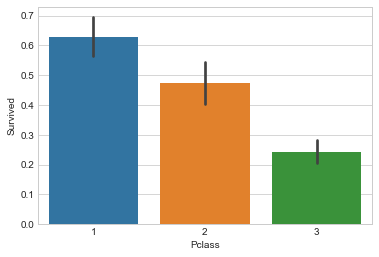

In [1089]:
sns.barplot(df['Pclass'], df['Survived'], data=df)

### Sex Feature

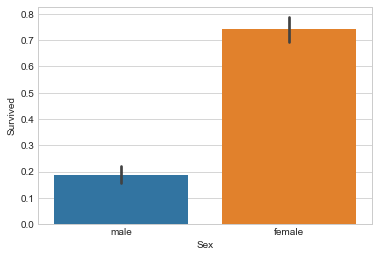

In [1090]:
sns.barplot(df['Sex'], df['Survived'], data=df)

### Age Feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Age    714 non-null float64
dtypes: float64(1)
memory usage: 7.0 KB
None


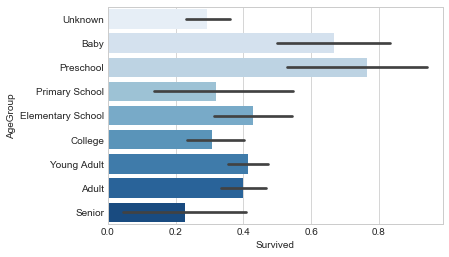

0                College
1                  Adult
2            Young Adult
3            Young Adult
4            Young Adult
5                Unknown
6                  Adult
7                   Baby
8            Young Adult
9      Elementary School
10             Preschool
11                 Adult
12               College
13                 Adult
14     Elementary School
15                 Adult
16                  Baby
17               Unknown
18           Young Adult
19               Unknown
20           Young Adult
21           Young Adult
22     Elementary School
23           Young Adult
24        Primary School
25                 Adult
26               Unknown
27               College
28               Unknown
29               Unknown
             ...        
861              College
862                Adult
863              Unknown
864          Young Adult
865                Adult
866          Young Adult
867          Young Adult
868              Unknown
869            Preschool


In [1091]:
print(df[['Age']].info())
df['Age'] = df['Age'].astype(float).fillna(-0.5)
bins = [-1, 0, 3, 6, 12, 18, 23, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Preschool', 'Primary School', 'Elementary School', 'College', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# sns.barplot(df['AgeGroup'], df['Survived'], data=df)
#draw a bar plot of Age vs. survival
sns.barplot(df['Survived'], df['AgeGroup'], data=df, palette='Blues')
plt.show()

print(df.AgeGroup)

### SibSp Feature

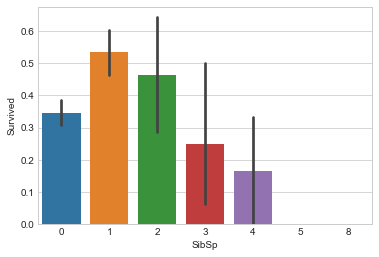

In [1092]:
sns.barplot(df['SibSp'], df['Survived'], data=df)

In [1093]:
#map each of the sip groups to a numerical value
sipSp_mapping = {0: 0, 1: 1, 2: 1}

df['SibSpGroup'] = df['SibSp'].map(sipSp_mapping)
df['SibSpGroup'] = df['SibSpGroup'].fillna(2)
df['SibSpGroup']

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
5      0.0
6      0.0
7      2.0
8      0.0
9      1.0
10     1.0
11     0.0
12     0.0
13     1.0
14     0.0
15     0.0
16     2.0
17     0.0
18     1.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     2.0
25     1.0
26     0.0
27     2.0
28     0.0
29     0.0
      ... 
861    1.0
862    0.0
863    2.0
864    0.0
865    0.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    0.0
876    0.0
877    0.0
878    0.0
879    0.0
880    0.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    0.0
888    1.0
889    0.0
890    0.0
Name: SibSpGroup, Length: 891, dtype: float64

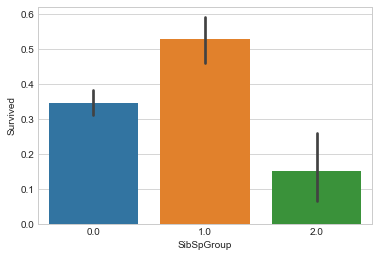

In [1094]:
sns.barplot(df['SibSpGroup'], df['Survived'], data=df)

### Parch Feature

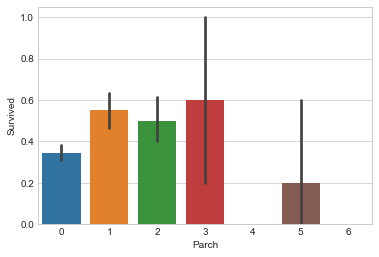

In [1095]:
sns.barplot(df['Parch'], df['Survived'], data=df)

### Fare Feature

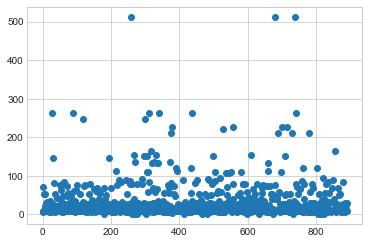

In [1096]:
plt.scatter(df.index, df.Fare)
plt.show()

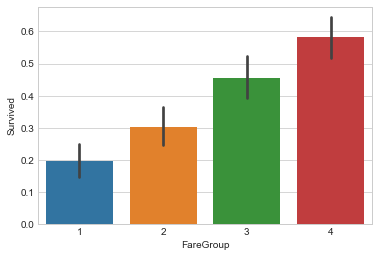

In [1097]:
labels = [1, 2, 3, 4]
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=labels)

sns.barplot(df['FareGroup'], df['Survived'], data=df)

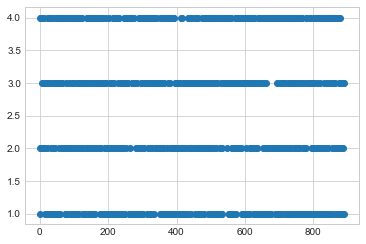

In [1098]:
plt.scatter(df.index, df.FareGroup)

In [1099]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
SibSpGroup     891 non-null float64
FareGroup      891 non-null category
dtypes: category(2), float64(3), int64(5), object(5)
memory usage: 92.9+ KB


### Cabin Feature

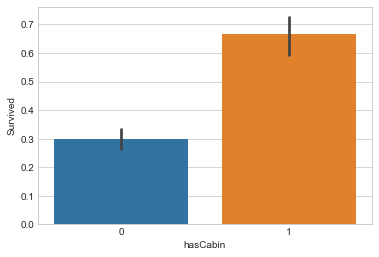

In [1100]:
df['hasCabin'] = df['Cabin'].notnull().astype(int)

sns.barplot(df['hasCabin'], df['Survived'], data=df)

### Embark Feature

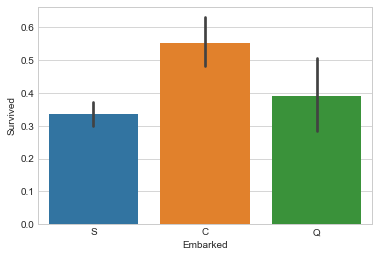

In [1101]:
sns.barplot(df['Embarked'], df['Survived'], data=df)

## 5. Cleaning Data

### Find null values

In [1102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
SibSpGroup     891 non-null float64
FareGroup      891 non-null category
hasCabin       891 non-null int64
dtypes: category(2), float64(3), int64(6), object(5)
memory usage: 99.8+ KB


### Pclass Feature

### Age Feature

In [1103]:
df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [1104]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


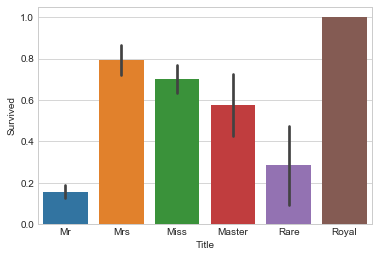

In [1105]:
#replace various titles with more common names

df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
df['Title'] = df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

sns.barplot(df['Title'], df['Survived'])

In [1106]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,College,1.0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1.0,4,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0.0,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1.0,4,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0.0,2,0,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Unknown,0.0,2,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult,0.0,4,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Baby,2.0,3,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young Adult,0.0,2,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Elementary School,1.0,3,0,3


In [1107]:
# print(df[['Age']].info())
# df['Age'] = df['Age'].astype(float)
# bins = [-1, 0, 3, 6, 12, 18, 23, 35, 60, np.inf]
# labels = ['Unknown', 'Baby', 'Preschool', 'Primary School', 'Elementary School', 'College', 'Young Adult', 'Adult', 'Senior']

# fill missing age with mode age group for each title
age_value = {}
for n in range(6):
    age_value[n+1] = df[df['Title'] == n+1]['AgeGroup'].mode()
    print(age_value[n+1].values)

[Young Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Young Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Baby]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Young Adult, Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]
[Adult]
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]


In [1108]:
df.AgeGroup.head(15)

0               College
1                 Adult
2           Young Adult
3           Young Adult
4           Young Adult
5               Unknown
6                 Adult
7                  Baby
8           Young Adult
9     Elementary School
10            Preschool
11                Adult
12              College
13                Adult
14    Elementary School
Name: AgeGroup, dtype: category
Categories (9, object): [Unknown < Baby < Preschool < Primary School ... College < Young Adult < Adult < Senior]

In [1109]:
age_title_mapping = {1: "Young Adult", 2: "Young Adult", 3: "Adult", 4: "Baby", 5: "Young Adult", 6: "Adult"}
# age_title_mapping = {1: "Young Adult", 2: "Young Adult", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

df.AgeGroup = df.AgeGroup.replace("Unknown", df["Title"].map(age_title_mapping))

In [1110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
SibSpGroup     891 non-null float64
FareGroup      891 non-null category
hasCabin       891 non-null int64
Title          891 non-null int64
dtypes: category(2), float64(3), int64(7), object(5)
memory usage: 106.8+ KB


In [1111]:
age_mapping = {'Baby': 1, 'Preschool': 2, 'Primary School': 3, 'Elementary School': 4, 'College': 5, 'Young Adult': 6, 'Adult': 7, 'Senior': 8}
df.AgeGroup = df.AgeGroup.map(age_mapping)

### Sex Feature

In [1112]:
df.Sex = (df.Sex.values == 'male').astype(int)
df['Sex'].head()
# Male = 1, Female = 0

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

### SibSp Feature

### Parch Feature

ok

### Fare Feature

In [1113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null int64
SibSpGroup     891 non-null float64
FareGroup      891 non-null category
hasCabin       891 non-null int64
Title          891 non-null int64
dtypes: category(1), float64(3), int64(9), object(4)
memory usage: 112.5+ KB


In [1114]:
#map Fare values into groups of numerical values
df['FareGroup'] = pd.cut(df['Fare'], 4, labels = [1, 2, 3, 4]).astype(int)
df[['Fare', 'FareGroup']].sample(10)

,Fare,FareGroup
268,153.4625,2
9,30.0708,1
869,11.1333,1
380,227.5250,2
363,7.0500,1
523,57.9792,1
136,26.2833,1
251,10.4625,1
14,7.8542,1
758,8.0500,1


In [1115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null int64
SibSpGroup     891 non-null float64
FareGroup      891 non-null int64
hasCabin       891 non-null int64
Title          891 non-null int64
dtypes: float64(3), int64(10), object(4)
memory usage: 118.4+ KB


### Cabin Feature

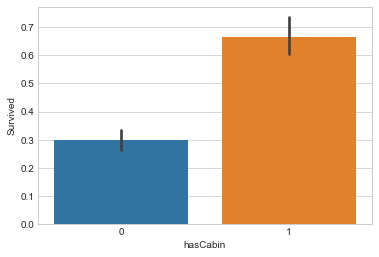

In [1116]:
sns.barplot(df['hasCabin'], df['Survived'], data=df)

### Embark Feature

In [1117]:
# map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

df['Embarked'] = df['Embarked'].fillna(2).astype(int)
df.sample(5)

# Southampton : 1
# Cherbourg : 2
# Queenstown : 3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin,Title
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",1,32.0,0,0,8471,8.3625,NaN,1,6,0.0,1,0,1
655,656,0,2,"Hickman, Mr. Leonard Mark",1,24.0,2,0,S.O.C. 14879,73.5000,NaN,1,6,1.0,1,0,1
244,245,0,3,"Attalah, Mr. Sleiman",1,30.0,0,0,2694,7.2250,NaN,2,6,0.0,1,0,1
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",0,45.0,1,1,36928,164.8667,NaN,1,7,1.0,2,0,3
313,314,0,3,"Hendekovic, Mr. Ignjac",1,28.0,0,0,349243,7.8958,NaN,1,6,0.0,1,0,1


### Drop unneeded columns

In [1118]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin,Title
622,623,1,3,"Nakid, Mr. Sahid",1,20.0,1,1,2653,15.7417,NaN,2,5,1.0,1,0,1
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",1,60.0,1,1,13567,79.2000,B41,2,7,1.0,1,1,1
702,703,0,3,"Barbara, Miss. Saiide",0,18.0,0,1,2691,14.4542,NaN,2,4,0.0,1,0,2
94,95,0,3,"Coxon, Mr. Daniel",1,59.0,0,0,364500,7.2500,NaN,1,7,0.0,1,0,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,-0.5,0,0,239853,0.0000,NaN,1,6,0.0,1,0,1


In [1126]:
df['SibSpGroup'] = df['SibSpGroup'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Parch         891 non-null int64
Embarked      891 non-null int64
AgeGroup      891 non-null int64
SibSpGroup    891 non-null int64
FareGroup     891 non-null int64
hasCabin      891 non-null int64
dtypes: int64(9)
memory usage: 62.7 KB


In [1127]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin', 'Age', 'SibSp', 'Title'], axis=1)
df.head(20)

ValueError: labels ['PassengerId' 'Name' 'Ticket' 'Fare' 'Cabin' 'Age' 'SibSp' 'Title'] not contained in axis

In [1128]:
df.describe()

,Survived,Pclass,Sex,Parch,Embarked,AgeGroup,SibSpGroup,FareGroup,hasCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.381594,1.363636,5.670034,0.369248,1.056117,0.228956
std,0.486592,0.836071,0.477990,0.806057,0.636159,1.465326,0.580118,0.294508,0.420397
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,1.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000,2.000000,7.000000,1.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,6.000000,3.000000,8.000000,2.000000,4.000000,1.000000


In [1122]:
df.columns.all()

'hasCabin'

In [1132]:
>>> from sklearn import preprocessing
df2 = df.drop('Survived', axis=1)
# >>> enc = preprocessing.OneHotEncoder(n_values=[3, 2, 6, 3, 8, 3, 4, 2])
enc = preprocessing.OneHotEncoder()
>>> # Note that there are missing categorical values for the 2nd and 3rd
>>> # features
>>> enc.fit(df2)  
>>> onehotlabels = enc.transform(df2).toarray()
onehotlabels.shape

<class 'numpy.ndarray'>


In [1139]:
onehotlabels = pd.DataFrame(onehotlabels)
onehotlabels = onehotlabels.astype(int)

In [1140]:
onehotlabels

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5,0,0,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
6,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
7,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
8,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
9,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


## 6. Using ML Models

### split data

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train = X.loc[0:701]
X_test = X.loc[701:]
y_train = y.loc[0:701]
y_test = y.loc[701:]

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_test.head()

In [ ]:
y_test.head()

### fit data in decision tree

In [ ]:
X_train.info()

In [ ]:
X_test.info()

### 3-Nearest Neighbor classification
with majority vote method

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

In [ ]:
df.Survived.value_counts()

### Naive Bayes classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

### decision-tree ( C4.5 or RainForest equivalent)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

## 7. Using 10-Fold-CV

### split data

In [ ]:
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
     print("%s %s" % (train, test))
# [2 3] [0 1]
# [0 1] [2 3]
# Each fold is constituted by two arrays: the first one is related to the training set, and the second one to the test set. Thus, one can create the training/test sets using numpy indexing:


X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.split(df)

In [ ]:
X_train

### 3-Nearest Neighbor classification
with majority vote method

### Naive Bayes classification

### decision-tree ( C4.5 or RainForest equivalent)

## 8. Reference

https://www.kaggle.com/omarelgabry/a-journey-through-titanic?scriptVersionId=447802/notebook
http://scikit-learn.org/stable/modules/naive_bayes.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html